In [1]:
from N_Level_Engine_v1 import*
import numpy as np
import numpy.random as random
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Debugging Successful

The steady-state no longer changes as I change the diagonal element of the P-matrix

In [2]:
pmatrix = np.array([[1,0.5],[0.5,1]])
getSteadyState(4,1,3,0.1,0.1,2,0.2,pmatrix,0,0,0.05)

array([[ 0.68169852+0.j        ,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ],
       [ 0.        +0.j        ,  0.02442976+0.j        ,
         0.        -0.01997108j,  0.        -0.01997108j],
       [ 0.        +0.j        ,  0.        +0.01997108j,
         0.14693586+0.j        , -0.00517164+0.j        ],
       [ 0.        +0.j        ,  0.        +0.01997108j,
        -0.00517164+0.j        ,  0.14693586+0.j        ]])

In [3]:
pmatrix = np.array([[0,0.5],[0.5,0]])
getSteadyState(4,1,3,0.1,0.1,2,0.2,pmatrix,0,0,0.05)

array([[ 0.68169852+0.j        ,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ],
       [ 0.        +0.j        ,  0.02442976+0.j        ,
         0.        -0.01997108j,  0.        -0.01997108j],
       [ 0.        +0.j        ,  0.        +0.01997108j,
         0.14693586+0.j        , -0.00517164+0.j        ],
       [ 0.        +0.j        ,  0.        +0.01997108j,
        -0.00517164+0.j        ,  0.14693586+0.j        ]])

When the system is degenerate, $p =1$ is a singular point

In [4]:
pmatrix = np.array([[1,1],[1,1]])
getSteadyState(4,1,3,0.1,0.1,2,0.2,pmatrix,0,0,0.05)

(-0.005583387256500542-3.542753163367385e-18j)


array([[0.80757671+0.j        , 0.        +0.j        ,
        0.        +0.j        , 0.        +0.j        ],
       [0.        +0.j        , 0.02575662+0.j        ,
        0.        -0.02045302j, 0.        -0.02045302j],
       [0.        +0.j        , 0.        +0.02045302j,
        0.08333333+0.j        , 0.08891672+0.j        ],
       [0.        +0.j        , 0.        +0.02045302j,
        0.08891672+0.j        , 0.08333333+0.j        ]])

However, p = 0.9999 is still ok. $p=1$ is dangerous, because the two degenerate level becomes exactly identical. 

In [5]:
pmatrix = np.array([[1,0.9999],[0.9999,1]])
getSteadyState(4,1,3,0.1,0.1,2,0.2,pmatrix,0,0,0.05)

array([[ 0.68105217+0.j        ,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ],
       [ 0.        +0.j        ,  0.02172176+0.j        ,
         0.        -0.01724909j,  0.        -0.01724909j],
       [ 0.        +0.j        ,  0.        +0.01724909j,
         0.14861304+0.j        , -0.00335024+0.j        ],
       [ 0.        +0.j        ,  0.        +0.01724909j,
        -0.00335024+0.j        ,  0.14861304+0.j        ]])

$p = 1$ is also dangerous point for $N > 2$

In [6]:
pmatrix = np.ones((3,3))
getSteadyState(5,1,3,0.1,0.1,2,0.2,pmatrix,0,0,0.05)

0.05963517357187863
(-0.13900962052067953-1.0797702501281611e-18j)


array([[ 0.87306017+0.j        ,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        ],
       [ 0.        +0.j        ,  0.03011603+0.j        ,
         0.        -0.01626519j,  0.        -0.01626519j,
         0.        -0.01626519j],
       [ 0.        +0.j        ,  0.        +0.01626519j,
        -0.02600196+0.j        ,  0.10190603+0.j        ,
         0.11258401+0.j        ],
       [ 0.        +0.j        ,  0.        +0.01626519j,
         0.04227086+0.j        ,  0.09656945+0.j        ,
         0.04964777+0.j        ],
       [ 0.        +0.j        ,  0.        +0.01626519j,
         0.17221918+0.j        , -0.0099874 +0.j        ,
         0.0262563 +0.j        ]])

When we sample the P-matrix randomly in $N >2$, these warnings can appear from time to time when some of the dipoles become too close to parallel. We also can not control all the $p$ elements because we only sample some of them. Thus, a simple solution is to keep $\Delta$ finite. In the code, I set $\Delta$ as total gap between the lowest and highest quasi-degenerate set and for simplicity the spacing is set to be equispace. So, in $N$ quasi-degenerate problem. The spacing between neighboring quasi-degenerate state is determined by $\Delta/(N-1)$. 

As a side remark, finite $\Delta$ makes the problem more interesting from synchronization perspective, because it means all the quasi-degenerate levels must have close but distinct natural frequencies. Thus, if they have steady-state coherence, they must adjust their rotation to a common frequency in the steady-state.

In [21]:
pmatrix = np.ones((3,3))
getSteadyState(5,1,3,0.1,0.1,2,0.2,pmatrix,0.1,0,0.05)

array([[ 6.20799838e-01+0.j        ,  0.00000000e+00+0.j        ,
         0.00000000e+00+0.j        ,  0.00000000e+00+0.j        ,
         0.00000000e+00+0.j        ],
       [ 0.00000000e+00+0.j        ,  2.06236897e-02+0.j        ,
        -5.45201788e-03-0.0117745j ,  1.47801477e-04-0.0124887j ,
         5.03937677e-03-0.00884141j],
       [ 0.00000000e+00+0.j        , -5.45201788e-03+0.0117745j ,
         1.24584669e-01+0.j        ,  3.81197068e-03-0.00026212j,
         5.65384743e-03+0.00013544j],
       [ 0.00000000e+00+0.j        ,  1.47801477e-04+0.0124887j ,
         3.81197068e-03+0.00026212j,  1.18960307e-01+0.j        ,
         7.46527846e-03+0.00030656j],
       [ 0.00000000e+00+0.j        ,  5.03937677e-03+0.00884141j,
         5.65384743e-03-0.00013544j,  7.46527846e-03-0.00030656j,
         1.15031497e-01+0.j        ]])

# Power Statistics

In [2]:
#Write function to generate correlation matrix
def correlation_matrix(N):
    corr_matrix = np.identity(N)
    for i in range(N-1):
        corr_matrix[0,i+1] = np.cos(2*np.pi*(random.uniform()))
    for i in range(0,N):
        for j in range(i+1, N):
            corr_matrix[i,j] = corr_matrix[0,i]*corr_matrix[0,j]+np.sqrt((1-corr_matrix[0,i]**2)*(1-corr_matrix[0,j]**2))
            corr_matrix[j,i] = corr_matrix[i,j]
    return(corr_matrix)

In [20]:
power_data1 = []
power_data2 = []
N1 = 50000
N2=100000
for i in range(N1):
    ss = getSteadyState(7,1,3,0.1,0.1,2,0.2,correlation_matrix(5),0.2,0,0.05)
    power_data1.append(powerSS(ss, 1,3,0.2,0.05))
for i in range(N2):
    ss = getSteadyState(7,1,3,0.1,0.1,2,0.2,correlation_matrix(5),0.2,0,0.05)
    power_data2.append(powerSS(ss, 1,3,0.2,0.05))

(-0.0033411198011311805+1.9750123787005815e-16j)
(-0.0005270191489587946+1.7381538537281754e-16j)


In [22]:
textfile = open("powerDist_N5_Engine_Gap0.2_50thousand.txt", "w")
for element in power_data1:
    textfile.write(str(element)+"\n")
textfile.close()

In [23]:
textfile = open("powerDist_N5_Engine_Gap0.2_100thousand.txt", "w")
for element in power_data2:
    textfile.write(str(element)+"\n")
textfile.close()

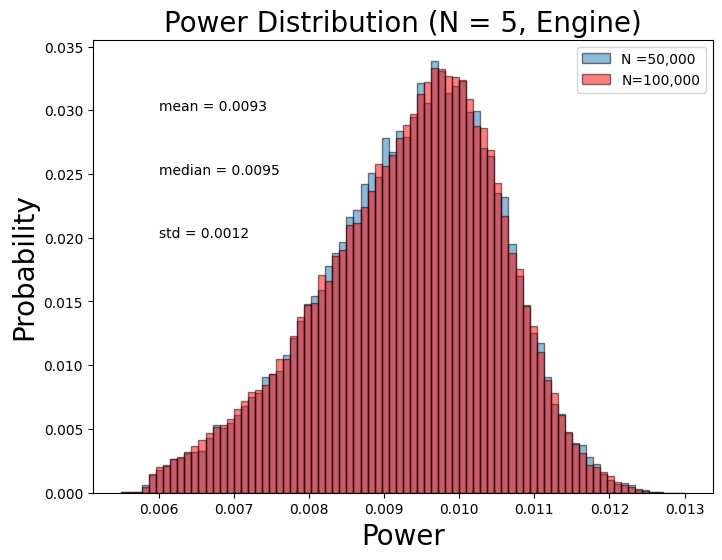

In [27]:
bin_list = np.linspace(0.0055,0.013,81)
figure(figsize=(8, 6), dpi=100)
weights1 = np.ones_like(power_data1)/len(power_data1)
weights2 = np.ones_like(power_data2)/len(power_data2)
plt.hist(power_data1, bins = bin_list, weights = weights1, edgecolor = 'black',label = 'N =50,000', alpha =0.5)
plt.hist(power_data2, bins = bin_list, weights = weights2, color = "red", edgecolor = 'black', label = 'N=100,000', alpha =0.5)
plt.legend()
plt.text(0.006, 0.030, s = 'mean = {0}'.format(round(np.mean(power_data1), 4)), size = 10)
plt.text(0.006, 0.025, s = 'median = {0}'.format(round(np.median(power_data1),4)), size= 10)
plt.text(0.006, 0.02, s = 'std = {0}'.format(round(np.std(power_data1),4)), size = 10)
plt.xlabel("Power", size =20)
plt.ylabel("Probability", size = 20)
plt.title("Power Distribution (N = 5, Engine)", size =20)
#plt.savefig('powerDistEngine_N=5.png', dpi=100)

In [28]:
power_data1 = []
power_data2 = []
N1 = 50000
N2=100000
for i in range(N1):
    ss = getSteadyState(5,1,3,0.1,0.1,2,0.2,correlation_matrix(3),0.2,0,0.05)
    power_data1.append(powerSS(ss, 1,3,0.2,0.05))
for i in range(N2):
    ss = getSteadyState(5,1,3,0.1,0.1,2,0.2,correlation_matrix(3),0.2,0,0.05)
    power_data2.append(powerSS(ss, 1,3,0.2,0.05))

In [29]:
textfile = open("powerDist_N3_Engine_Gap0.2_50thousand.txt", "w")
for element in power_data1:
    textfile.write(str(element)+"\n")
textfile.close()

In [30]:
textfile = open("powerDist_N3_Engine_Gap0.2_100thousand.txt", "w")
for element in power_data2:
    textfile.write(str(element)+"\n")
textfile.close()

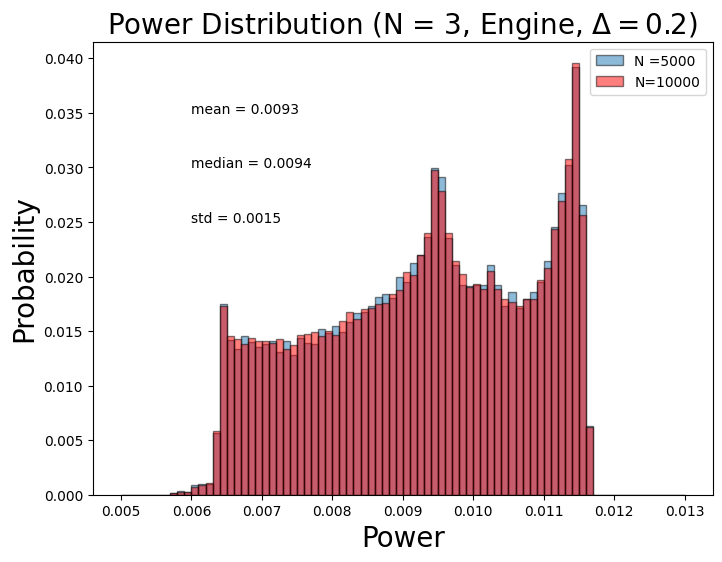

In [33]:
bin_list = np.linspace(0.005,0.013,81)
figure(figsize=(8, 6), dpi=100)
weights1 = np.ones_like(power_data1)/len(power_data1)
weights2 = np.ones_like(power_data2)/len(power_data2)
plt.hist(power_data1, bins = bin_list, weights = weights1, edgecolor = 'black',label = 'N =5000', alpha =0.5)
plt.hist(power_data2, bins = bin_list, weights = weights2, color = "red", edgecolor = 'black', label = 'N=10000', alpha =0.5)
plt.legend()
plt.text(0.006, 0.035, s = 'mean = {0}'.format(round(np.mean(power_data1), 4)), size = 10)
plt.text(0.006, 0.03, s = 'median = {0}'.format(round(np.median(power_data1),4)), size= 10)
plt.text(0.006, 0.025, s = 'std = {0}'.format(round(np.std(power_data1),4)), size = 10)
plt.xlabel("Power", size =20)
plt.ylabel("Probability", size = 20)
plt.title("Power Distribution (N = 3, Engine, $\Delta =0.2$)", size =20)
plt.savefig('powerDistEngine_N=3.png', dpi=100)

(array([2095.,  889.,  727.,  659.,  655.,  609.,  650.,  699.,  953.,
        2064.]),
 array([-9.99999992e-01, -7.99999995e-01, -5.99999998e-01, -4.00000000e-01,
        -2.00000003e-01, -6.14202733e-09,  1.99999991e-01,  3.99999988e-01,
         5.99999985e-01,  7.99999982e-01,  9.99999980e-01]),
 <BarContainer object of 10 artists>)

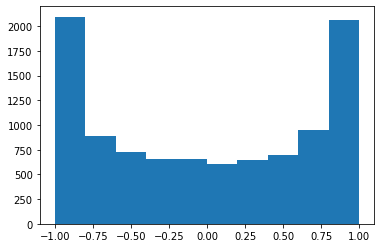

In [9]:
p = [];
for i in range(10000):
    pmatrix = correlation_matrix(2)
    for j in range(len(pmatrix)):
        for k in range(j+1, len(pmatrix)):
            p.append(pmatrix[j,k])
plt.hist(p)